# **ASSIGNMENT**

### Experiment 3 : Implementation of a simple neural network to classify both
### linearly separable and non-linearly separable datasets, using Numpy.







# Anjali Kumari
# 25/AFI/17

In [24]:
import numpy as np

### DATASET:   AND GATE(linear dataset)  and  XOR GATE (non-linear dataset)

In [25]:
# AND Gate Dataset
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([
    0,
    0,
    0,
    1
])

print("AND Gate Inputs:")
print(X_and)

print("AND Gate Outputs:")
print(y_and)


AND Gate Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
AND Gate Outputs:
[0 0 0 1]


In [26]:
# XOR Gate Dataset
X_xor= np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor= np.array([
    0,
    1,
    1,
    0
])

print("XOR Gate Inputs:")
print(X_xor)

print("XOR Gate Outputs:")
print(y_xor)


XOR Gate Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
XOR Gate Outputs:
[0 1 1 0]


In [27]:
print("AND X shape:", X_and.shape)
print("AND y shape:", y_and.shape)

print("XOR X shape:", X_xor.shape)
print("XOR y shape:", y_xor.shape)


AND X shape: (4, 2)
AND y shape: (4,)
XOR X shape: (4, 2)
XOR y shape: (4,)


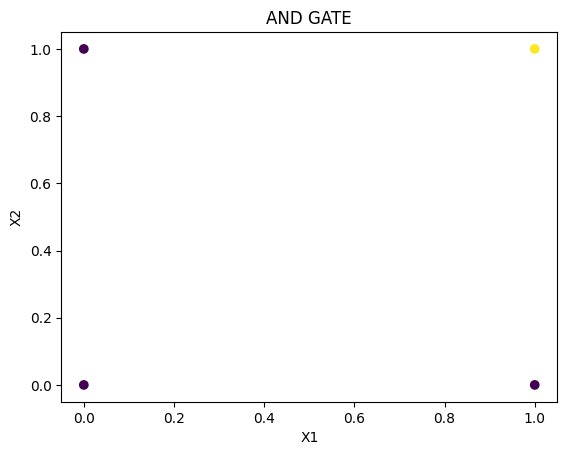

In [29]:
import matplotlib.pyplot as plt
#plot graph for AND GATE
plt.scatter(X_and[:,0],X_and[:,1],c=y_and)
plt.title("AND GATE")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

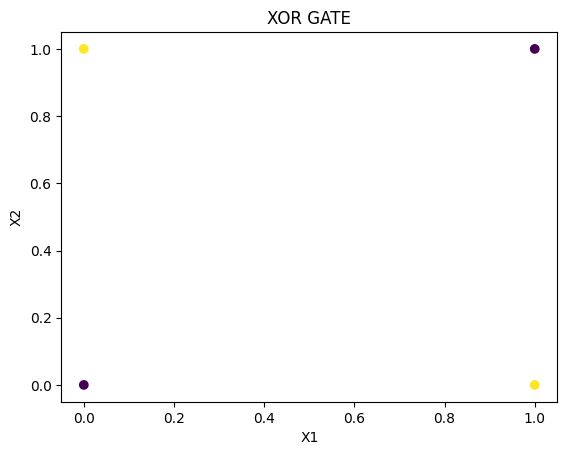

In [30]:
#plot graph for XOR GATE
plt.scatter(X_xor[:,0],X_xor[:,1],c=y_xor)
plt.title("XOR GATE")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## **Build single perceptron model to solve linear(AND GATE) and non-linear problem(XOR GATE)**

In [31]:
#define step activation function
def step_activation(z):
   if(z>=0):
    return 1
   else:
    return 0

In [32]:
# Train Perceptron
def train_perceptron(X, y, epochs=20, learning_rate=0.1):
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    print("\nInitial Weights:", weights)
    print("Initial Bias:", bias)

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            y_pred = step_activation(z)
            error = y[i] - y_pred

            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

            total_error += abs(error)

        print(f"Epoch {epoch+1}, Total Error: {total_error}")
    return weights, bias


In [33]:
#train AND GATE
weights1,bias1=train_perceptron(X_and,y_and)

print("\nWeights after training:", weights1)
print("Bias after training:", bias1)



Initial Weights: [0.13173476 0.40485951]
Initial Bias: 0.8365352826870449
Epoch 1, Total Error: 3
Epoch 2, Total Error: 3
Epoch 3, Total Error: 2
Epoch 4, Total Error: 3
Epoch 5, Total Error: 2
Epoch 6, Total Error: 2
Epoch 7, Total Error: 3
Epoch 8, Total Error: 2
Epoch 9, Total Error: 1
Epoch 10, Total Error: 0
Epoch 11, Total Error: 0
Epoch 12, Total Error: 0
Epoch 13, Total Error: 0
Epoch 14, Total Error: 0
Epoch 15, Total Error: 0
Epoch 16, Total Error: 0
Epoch 17, Total Error: 0
Epoch 18, Total Error: 0
Epoch 19, Total Error: 0
Epoch 20, Total Error: 0

Weights after training: [0.23173476 0.10485951]
Bias after training: -0.263464717312955


In [34]:
#train XOR GATE
weights2,bias2=train_perceptron(X_xor,y_xor)


print("\nWeights after training:", weights2)
print("Bias after training:", bias2)



Initial Weights: [0.84342957 0.26414456]
Initial Bias: 0.01638185477973997
Epoch 1, Total Error: 2
Epoch 2, Total Error: 2
Epoch 3, Total Error: 2
Epoch 4, Total Error: 2
Epoch 5, Total Error: 2
Epoch 6, Total Error: 2
Epoch 7, Total Error: 2
Epoch 8, Total Error: 2
Epoch 9, Total Error: 3
Epoch 10, Total Error: 2
Epoch 11, Total Error: 2
Epoch 12, Total Error: 3
Epoch 13, Total Error: 4
Epoch 14, Total Error: 4
Epoch 15, Total Error: 4
Epoch 16, Total Error: 4
Epoch 17, Total Error: 4
Epoch 18, Total Error: 4
Epoch 19, Total Error: 4
Epoch 20, Total Error: 4

Weights after training: [-0.05657043  0.06414456]
Bias after training: 0.01638185477973997


In [35]:
def plot_decision_boundary(X, y, weights, bias, title):
    x_vals = np.linspace(0.0, 1.0, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.xlabel("Input X1")
    plt.ylabel("Input X2")
    plt.show()

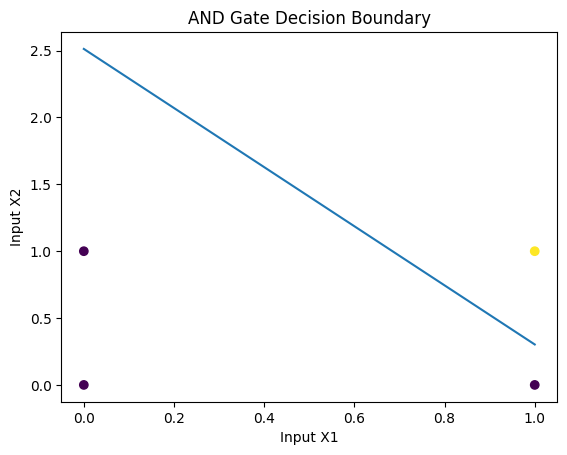

In [36]:
plot_decision_boundary(X_and, y_and, weights1, bias1, "AND Gate Decision Boundary")

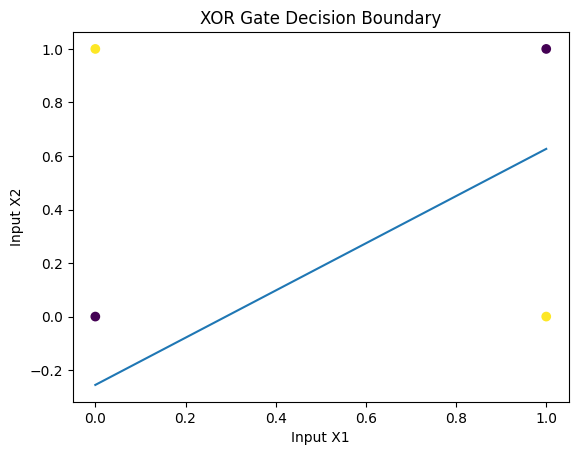

In [37]:
plot_decision_boundary(X_xor, y_xor, weights2, bias2,
                       "XOR Gate Decision Boundary")

## **Build multi-layer perceptron model to solve non-linear problem(XOR)**

In [38]:
#define relu activation function
def relu(z):
  return np.maximum(0,z)

In [39]:
def relu_derivative(z):
  return (z>0).astype(float)

In [40]:
#define sigmoid activation fun
def sigmoid(z):
   return 1/(1+np.exp(-z))

In [46]:
def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

In [57]:
def train_multilayer_perceptron(x_train, y_train):

    # Initialize weights and biases
    w1 = np.random.randn(2, 4)
    b1 = np.zeros((1, 4))

    w2 = np.random.randn(4, 1)
    b2 = np.zeros((1, 1))

    learning_rate = 0.1
    epochs = 5000

    for epoch in range(epochs):
        total_loss = 0

        for i in range(x_train.shape[0]):

            # Input sample
            dp = x_train[i].reshape(1, -1)
            y = y_train[i].reshape(1, -1)

            # ================= FORWARD PASS =================

            z1 = np.dot(dp, w1) + b1
            a1 = relu(z1)   # Hidden layer activation

            z2 = np.dot(a1, w2) + b2
            y_hat = sigmoid(z2)  # Output layer activation

            # ================= LOSS =================
            loss = (y - y_hat) ** 2
            total_loss += loss

            # ================= BACKPROPAGATION =================

            # Output layer gradient
            dL_dyhat = 2 * (y_hat - y)
            dL_dz2 = dL_dyhat * sigmoid_derivative(y_hat)

            dW2 = np.dot(a1.T, dL_dz2)
            db2 = dL_dz2

            # Hidden layer gradient
            d_hidden = np.dot(dL_dz2, w2.T) * relu_derivative(z1)

            dW1 = np.dot(dp.T, d_hidden)
            db1 = d_hidden

            # ================= UPDATE =================

            w2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            w1 -= learning_rate * dW1
            b1 -= learning_rate * db1

        # Print loss sometimes
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss[0][0]:.6f}")

    return w1, b1, w2, b2


In [58]:
w1,b1,w2,b2=train_multilayer_perceptron(X_xor,y_xor)

Epoch 0, Loss: 1.065472
Epoch 500, Loss: 0.015306
Epoch 1000, Loss: 0.006010
Epoch 1500, Loss: 0.003633
Epoch 2000, Loss: 0.002573
Epoch 2500, Loss: 0.001981
Epoch 3000, Loss: 0.001604
Epoch 3500, Loss: 0.001345
Epoch 4000, Loss: 0.001158
Epoch 4500, Loss: 0.001019


In [59]:
print(w2)

[[-1.42526121]
 [ 3.48766669]
 [ 0.78697803]
 [ 2.94455379]]


In [60]:
print(w1)

[[ 0.17251917 -2.44998317 -1.50135273  2.94521451]
 [-1.37543921  2.44966428 -1.88061406 -2.94539347]]


In [61]:
print(b1)

[[-1.85477273e-01 -2.14729717e-04  0.00000000e+00  4.89404382e-07]]


In [62]:
print(b2)

[[-3.93330558]]


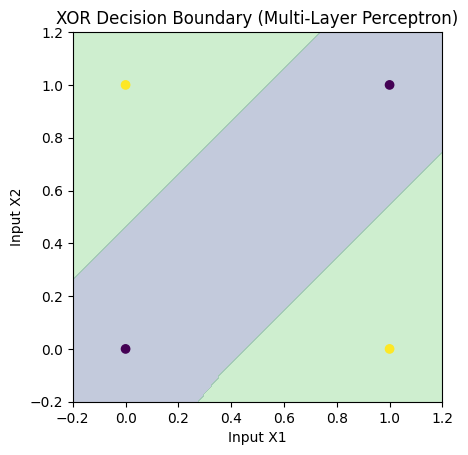

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Activation functions
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass
def forward_pass(X, w1, b1, w2, b2):
    z1 = X @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    return sigmoid(z2)

# Replace with your trained parameters
weight1 = w1
bias1 = b1
weight2 = w2
bias2 = b2

# Create grid space
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200),
                     np.linspace(-0.2, 1.2, 200))

grid = np.c_[xx.ravel(), yy.ravel()]

# Predict over grid
preds = forward_pass(grid, w1, b1, w2, b2)
preds = preds.reshape(xx.shape)

# Plot decision boundary
plt.figure()
plt.contourf(xx, yy, preds > 0.5, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("XOR Decision Boundary (Multi-Layer Perceptron)")
plt.xlabel("Input X1")
plt.ylabel("Input X2")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
